In [25]:
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from pprint import pprint
import random
from sklearn import preprocessing
from __future__ import division
import pickle


filename = '../data/parking_citations.corrupted.csv'
random.seed(42)

In [64]:
# Get headers and data types
columns = []
with open(filename) as f:
    reader = csv.reader(f)
    columns = reader.next()
    
names = [col.replace(" ","_") for col in columns]

dtypes = {
    'Ticket_number': 'unicode' ,
    'Issue_Date': 'unicode' ,
    'Issue_Time':'unicode'  ,
    'Meter_Id': 'unicode',
    'Marked_Time': 'unicode' ,
    'RP_State_Plate': 'unicode',
    'Plate_Expiry_Date': 'unicode' ,
    'VIN': 'unicode' ,
    'Make': 'unicode' ,
    'Body Style': 'unicode' ,
    'Color': 'unicode' ,
    'Location': 'unicode' ,
    'Route': 'unicode' ,
    'Agency': 'unicode' ,
    'Violation_Code': 'unicode' ,
    'Violation_Description': 'unicode' ,
    'Fine_amount': np.float64 ,
    'Latitude': np.float64 ,
    'Longitude': np.float64 ,
}

parse_dates = [
    'Issue_Date' ,
]

In [65]:
# Load data from file
citations = pd.read_csv(
    filename ,
    header = 0 ,
    names = names ,
    dtype = dtypes ,
    parse_dates = parse_dates ,
)

citations = citations[citations.Make.notnull()]

In [6]:
# Optional: take a random sample for exploration purposes
citations = citations.sample(frac = 0.1, random_state=42)

In [7]:
# Label dataset by top 25 makes
top_25_makes = citations.groupby(['Make']).size().sort_values(ascending=False)
make_names = set(top_25_makes.index[:25])

citations['top_25_makes'] = citations['Make'].apply(lambda x: (x in make_names)*1)
citations['top_25_makes'] = citations['top_25_makes'].astype('category')

# Convert date to days since epoch
citations['Issue_Date_Days'] = (citations['Issue_Date'] - pd.datetime(1970,1,1)).dt.days



In [9]:
citations.describe(include='all')

,Ticket_number,Issue_Date,Issue_time,RP_State_Plate,Plate_Expiry_Date,Make,Body_Style,Color,Location,Route,Agency,Violation_code,Violation_Description,Fine_amount,Latitude,Longitude,top_25_makes,Issue_Date_Days
count,4357544,4357544,4.357544e+06,4.357544e+06,4357544.0,4357544,4.357544e+06,4.357544e+06,4357395,4.357544e+06,4.357544e+06,4.357544e+06,4.357544e+06,4.357544e+06,4.357543e+06,4.357543e+06,4357544.0,4.357544e+06
unique,4357544,1724,NaN,NaN,710.0,1477,NaN,NaN,1047757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
top,4254111606,2016-01-19 00:00:00,NaN,NaN,201702.0,TOYT,NaN,NaN,1301 ELECTRIC AVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
freq,1,4998,NaN,NaN,396547.0,721411,NaN,NaN,4719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3986214.0,NaN
first,NaN,2010-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.203869e+03,8.997933e+00,NaN,NaN,7.875941e+01,3.782300e+01,NaN,9.119001e+02,2.106232e+01,1.625721e+02,4.815551e+02,7.010722e+01,5.503485e+06,1.587400e+06,NaN,1.715337e+04
std,NaN,NaN,4.722119e+02,9.383043e+00,NaN,NaN,1.189833e+01,2.760509e+01,NaN,1.483717e+03,3.879709e+00,5.271173e+01,7.333203e+01,3.204423e+01,3.025596e+06,2.098413e+06,NaN,4.187181e+02
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,9.999900e+04,9.999900e+04,NaN,1.461800e+04
25%,NaN,NaN,9.120000e+02,7.000000e+00,NaN,NaN,7.700000e+01,7.000000e+00,NaN,2.490000e+02,1.900000e+01,1.430000e+02,4.650000e+02,6.300000e+01,6.421524e+06,1.821596e+06,NaN,1.679300e+04


In [8]:
# Drop vars with too many NA's
drop_vars = [
    'VIN' ,
    'Marked_Time' ,
    'Meter_Id'
]
try:
    citations.drop(drop_vars , axis=1, inplace=True)
except KeyError:
    print("Already dropped columns.")

# Fill in nulls as appropriate
citations['Issue_time'] = citations['Issue_time'].fillna(citations['Issue_time'].median())
citations['Fine_amount'] = citations['Fine_amount'].fillna(citations['Fine_amount'].median())
citations['Plate_Expiry_Date'] = citations['Plate_Expiry_Date'].fillna(citations['Plate_Expiry_Date'].median())

# Fill in nulls for categorical variables
categorical_vars = [
    'RP_State_Plate' ,
    'Body_Style' ,
    'Color' ,
    'Route' ,
    'Agency' ,
    'Violation_code' ,
    'Violation_Description' ,
    'Location'
]

for v in categorical_vars:
    print(v)
    citations[v] = citations[v].astype('category')
    citations[v] = citations[v].fillna(citations[v].mode().values[0])

RP_State_Plate
Body_Style
Color
Route
Agency
Violation_code
Violation_Description
Location


In [9]:
# Encode categorical variables
for v in categorical_vars:
    le = preprocessing.LabelEncoder()
    le.fit(citations[v])
    citations[v] = le.transform(citations[v])

In [10]:
feature_cols = [
    'Issue_Date_Days' ,
    'Issue_time' ,
    'RP_State_Plate' ,
    'Plate_Expiry_Date' ,
    'Body_Style' ,
    'Color' ,
    'Location' ,
    'Route' ,
    'Agency' ,
    'Violation_code' ,
    'Violation_Description' ,
    'Fine_amount' ,
    #'Latitude' , # These numbers too large for float32 and break RF classifier.
    #'Longitude'
]

target_cols = [
    'top_25_makes' ,
]

In [11]:
labels = np.array(citations[target_cols])
features = np.array(citations[feature_cols])
#features = np.array(citations)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Instantiate model with 100 decision trees
#rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
#rf.fit(train_features, train_labels)

In [13]:
# Model scores
# first run of random forest only SLIGHTLY better than our baseline -- why?
rf.score(test_features, test_labels)

0.920395817843013

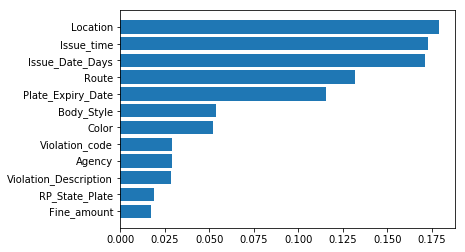

In [57]:
# Visualize feature importance
feature_importance = pd.DataFrame(
    rf.feature_importances_ ,
    index = feature_cols ,
    columns = ['importance'] ,
).sort_values('importance',ascending=False)


y_pos = np.arange(len(feature_importance.index))

fig, ax = plt.subplots()

ax.barh(y_pos, feature_importance['importance'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_importance.index)
ax.invert_yaxis()


plt.show()


In [17]:
# Check skew of labels
split = (citations['top_25_makes'].value_counts()) / citations.shape[0]
print(split)

1    0.914785
0    0.085215
Name: top_25_makes, dtype: float64


In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

predictions = rf.predict(test_features)
confusion = confusion_matrix(y_true = test_labels, y_pred = predictions)

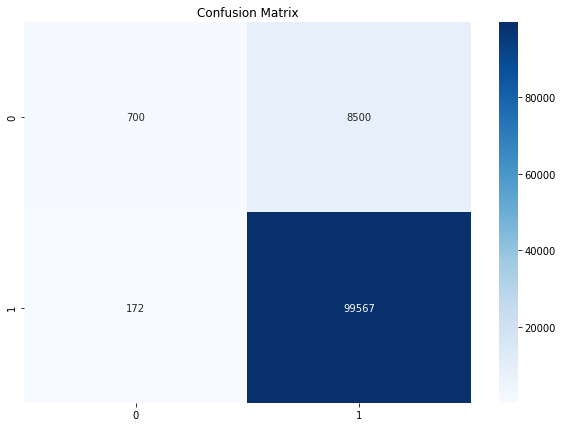

In [59]:
plt.figure(figsize=(10,7))
plt.title("Confusion Matrix")
sn.heatmap(confusion, annot=True, cmap='Blues', fmt='g')

In [63]:
# Write model out to disk
with open('../app/models/simple_random_forest.pkl','wb') as f:
    pickle.dump(rf,f)